## 第5章 線形回帰予測を行う10本ノック

### ノック41 : データを加工しよう

#### データの読み込み

In [31]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [32]:
import pandas as pd

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 説明変数・目的変数の分割

In [33]:
X = df[housing.feature_names]
y = df[["MEDV"]]

display(X.head())
display(y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


#### 訓練データ・テストデータの分割

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

display(len(X_train))
display(X_train)

display(len(X_test))
display(X_test)

14448

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


6192

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,0.930470,1168.0,2.388548,39.15,-121.62
12156,4.1386,2.0,8.821216,1.414779,2826.0,3.368296,33.66,-117.17
10211,7.8750,30.0,7.550926,0.981481,523.0,2.421296,33.89,-117.91
2445,2.0658,34.0,5.938144,1.206186,363.0,3.742268,36.56,-119.64


### ノック42 : データをスケーリングしよう

#### データのスケーリング

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

display(X_train_scaled[:3])
display(X_test_scaled[:3])

array([[-1.00030408,  1.8562098 , -1.146823  , -0.87197529, -1.07186955,
         0.25982829,  0.51396387, -0.11131397],
       [-0.84938602,  1.14171192, -0.76585476,  0.19733493, -0.51251556,
        -0.00327132,  0.99993462, -1.3173838 ],
       [ 1.28620508, -0.92239307,  0.46102722, -0.0151584 , -0.03319355,
         0.11210392, -0.82245571,  0.76084397]])

array([[ 0.14156681, -0.53250822,  0.07721063, -0.04931106,  0.11432005,
         0.06581932, -1.43730657,  1.26571866],
       [ 0.98944483,  0.26370807,  0.23237326, -0.33345966, -0.11930789,
        -0.00759713, -0.80707125,  0.80488164],
       [ 0.24412682,  0.02484318,  0.17070885, -0.1440469 ,  0.11706862,
        -0.01461622,  1.41756538, -1.13363929]])

### ノック43 : 重回帰モデルを構築しよう

#### 重回帰モデルの構築

In [36]:
from sklearn.linear_model import LinearRegression

# X_train_scaled は、複数の説明変数
multi_reg = LinearRegression().fit(X_train_scaled, y_train)

#### 学習データを使用した予測値の算出

In [37]:
y_train_pred = multi_reg.predict(X_train_scaled)

#### テストデータを使用した予測値の算出

In [38]:
y_test_pred = multi_reg.predict(X_test_scaled)

#### 結果の表示

In [39]:
display(len(y_train_pred))
display(y_train_pred[:5])

display(len(y_test_pred))
display(y_test_pred[:5])

14448

array([[1.14308253],
       [1.99658954],
       [2.98998518],
       [1.49274811],
       [1.32516045]])

6192

array([[2.27073513],
       [2.79909824],
       [1.91082021],
       [1.00041803],
       [2.9385367 ]])

### ノック44 : 重回帰モデルを評価しよう

#### 残差プロット

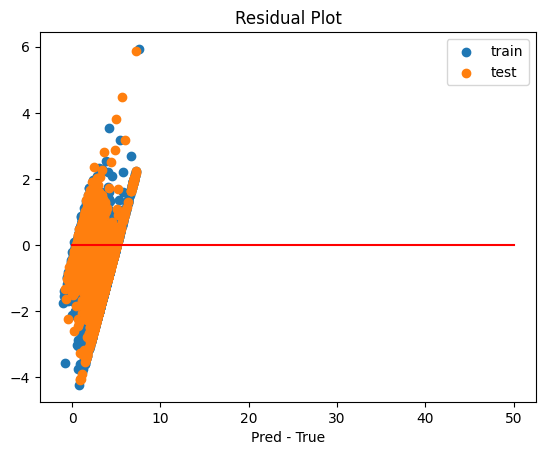

In [40]:
import  matplotlib.pyplot as plt


def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
    """ 残差プロット
    """
    plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
    plt.scatter(y_test_pred, y_test_pred - y_test, label="test")

    plt.plot([0, 50], [0, 0], color="red")
    
    plt.xlabel("Pred")
    plt.xlabel("Pred - True")
    
    plt.title("Residual Plot")
    
    plt.legend()
    plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

#### スコア算出（重回帰モデル）

In [41]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np

def get_eval_score(y_true, y_pred):

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_true, y_pred)
    
    display("テストデータ スコア")
    display(f"MAE = {mae}")
    display(f"MSE = {mse}")
    display(f"RMSE = {rmse}")
    display(f"R2 = {r2score}")

In [42]:
print("訓練データスコア")
get_eval_score(y_train, y_train_pred)

訓練データスコア


'テストデータ スコア'

'MAE = 0.5293466964613609'

'MSE = 0.5173003362697665'

'RMSE = 0.7192359392228439'

'R2 = 0.6112941337977225'

In [43]:
print("テストデータスコア")
get_eval_score(y_test, y_test_pred)

テストデータスコア


'テストデータ スコア'

'MAE = 0.5342905374714837'

'MSE = 0.5426453732570815'

'RMSE = 0.7366446723197566'

'R2 = 0.5929865012099728'

#### ノック45 : 各説明変数の重みを確認してみよう


In [44]:
for i, (col, coef) in enumerate(zip(housing.feature_names, multi_reg.coef_[0])):
    print(f"w{i}({col}) = {coef}")

print(f"b = {multi_reg.intercept_[0]}")

w0(MedInc) = 0.8448908486176182
w1(HouseAge) = 0.11568529612994956
w2(AveRooms) = -0.2701968679728307
w3(AveBedrms) = 0.29078838029096676
w4(Population) = -0.010771498000080489
w5(AveOccup) = -0.02805795811729649
w6(Latitude) = -0.8753288953620151
w7(Longitude) = -0.8495986883646364
b = 2.0682462451550454


### ノック46 : LASSO回帰モデルを構築しよう

#### LASSO回帰モデルの構築

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)

#### 予測値の出力

In [47]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

display(len(y_train_pred))
display(y_train_pred[:5])

display(len(y_test_pred))
display(y_test_pred[:5])

14448

array([2.06824625, 2.06824625, 2.06824625, 2.06824625, 2.06824625])

6192

array([2.06824625, 2.06824625, 2.06824625, 2.06824625, 2.06824625])

In [48]:
y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

display(y_train_pred[:5])
display(y_test_pred[:5])

array([[2.06824625],
       [2.06824625],
       [2.06824625],
       [2.06824625],
       [2.06824625]])

array([[2.06824625],
       [2.06824625],
       [2.06824625],
       [2.06824625],
       [2.06824625]])

### ノック47 : LASSO回帰モデルを評価しよう

In [49]:
print("訓練データスコア")
get_eval_score(y_train, y_train_pred)

訓練データスコア


'テストデータ スコア'

'MAE = 0.9102203910206986'

'MSE = 1.3308271915828764'

'RMSE = 1.1536148367556982'

'R2 = 0.0'

In [50]:
print("テストデータスコア")
get_eval_score(y_test, y_test_pred)

テストデータスコア


'テストデータ スコア'

'MAE = 0.9149721332821296'

'MSE = 1.3332378775677824'

'RMSE = 1.1546592040804864'

'R2 = -8.108632143510874e-07'

In [51]:
for i, (col, coef) in enumerate(zip(housing.feature_names, multi_reg.coef_[0])):
    print(f"w{i}({col}) = {coef}")

print(f"b = {multi_reg.intercept_[0]}")

w0(MedInc) = 0.8448908486176182
w1(HouseAge) = 0.11568529612994956
w2(AveRooms) = -0.2701968679728307
w3(AveBedrms) = 0.29078838029096676
w4(Population) = -0.010771498000080489
w5(AveOccup) = -0.02805795811729649
w6(Latitude) = -0.8753288953620151
w7(Longitude) = -0.8495986883646364
b = 2.0682462451550454
